# Association Analysis
## Frequent Itemset Mining using Apriori Algorithm

### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data
For my dataset I choose a grocery dataset I found on Kaggle here:
https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/ </br>
The dataset has 38765 rows of the purchase orders of people from the grocery stores - and it needs a bit of pre-processing to extract a dataset of transactions as seen below.

In [2]:
df = pd.read_csv('./Groceries_dataset.csv', sep=',')
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Extracting all transactions for association analysis
I group by 'member_number' and 'date' in the original dataset and keep only the item list.

In [3]:
# print(list(df.groupby(['Member_number','Date']))[0])
transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number','Date']))]
transactions[:5]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables']]

### Put the transactions list (of lists) into a dataframe to be able to use methods from Tutorial_9_AssociationAnalysis
The transactions dataset has 14963 rows (more than 10000 rows).

In [4]:
transactions_df = pd.DataFrame(transactions)
print("Columns: ", transactions_df.columns)
transactions_df

Columns:  RangeIndex(start=0, stop=11, step=1)


,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,None,None,None,None,None,None,None
1,whole milk,pastry,salty snack,None,None,None,None,None,None,None,None
2,canned beer,misc. beverages,None,None,None,None,None,None,None,None,None
3,sausage,hygiene articles,None,None,None,None,None,None,None,None,None
4,soda,pickled vegetables,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
14958,tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins,None,None,None,None,None
14959,bottled water,herbs,None,None,None,None,None,None,None,None,None
14960,fruit/vegetable juice,onions,None,None,None,None,None,None,None,None,None
14961,soda,root vegetables,semi-finished bread,None,None,None,None,None,None,None,None


Now each row of the dataframe represents items that were purchased together on the same day by the same member.
The dataset is a **sparse dataset** as relatively high percentage of data is NA or NAN or equivalent. 
Let's see all the unique items in the dataset.

In [5]:
items = np.unique(transactions_df.values[transactions_df.values != None])
print("Number of unique items: ", len(items))
items

Number of unique items:  167


array(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer',
       'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk',
       'cake bar', 'candles', 'candy', 'canned beer', 'canned fish',
       'canned fruit', 'canned vegetables', 'cat food', 'cereals',
       'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow',
       'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks',
       'coffee', 'condensed milk', 'cooking chocolate', 'cookware',
       'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier',
       'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes',
       'dog food', 'domestic eggs', 'female sanitary products',
       'finished products', 'fish', 'flour', 'flower (seeds)',
       'flower soil/fertilizer', 'frankfurter', 'frozen chicken',
       'frozen dessert', 'frozen fish

### Data Preprocessing - use the function provided in the tutorial

apriori module requires a dataframe that has either 0 and 1 or True and False as data. 
The data we have is all string (name of items), we need to **One Hot Encode** the data.

##### Custom One Hot Encoding
Note: I replaced 0 with False and 1 with True to get rid of the warning: </br>
"DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type"

In [6]:
encoded_vals = []
for index, row in transactions_df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = False
    for com in commons:
        labels[com] = True
    encoded_vals.append(labels)
encoded_vals[0]

{'herbs': False,
 'whipped/sour cream': False,
 'condensed milk': False,
 'chicken': False,
 'oil': False,
 'potato products': False,
 'frozen fish': False,
 'cooking chocolate': False,
 'berries': False,
 'cleaner': False,
 'pastry': False,
 'napkins': False,
 'cat food': False,
 'frankfurter': False,
 'organic sausage': False,
 'meat spreads': False,
 'specialty cheese': False,
 'soups': False,
 'long life bakery product': False,
 'dental care': False,
 'kitchen towels': False,
 'specialty bar': False,
 'grapes': False,
 'soap': False,
 'other vegetables': False,
 'cereals': False,
 'specialty fat': False,
 'liver loaf': False,
 'abrasive cleaner': False,
 'baby cosmetics': False,
 'frozen chicken': False,
 'instant coffee': False,
 'sparkling wine': False,
 'coffee': False,
 'ketchup': False,
 'cocoa drinks': False,
 'mustard': False,
 'sauces': False,
 'tea': False,
 'snack products': False,
 'baking powder': False,
 'flower soil/fertilizer': False,
 'pudding powder': False,
 'turk

One Hot Encoded dataset

In [7]:
ohe_df = pd.DataFrame(encoded_vals)
print("All columns (items): ", ohe_df.columns)
print("Number of single item transactions: ", len(ohe_df[ohe_df.apply(lambda x: sum(x) == 1, axis=1)]))
# Drop rows with single item transaction. There are 205 of them and this speeds up the analysis a bit.
ohe_df = ohe_df[ohe_df.apply(lambda x: sum(x) > 1, axis=1)]
ohe_df.head(3)

All columns (items):  Index(['herbs', 'whipped/sour cream', 'condensed milk', 'chicken', 'oil',
       'potato products', 'frozen fish', 'cooking chocolate', 'berries',
       'cleaner',
       ...
       'dishes', 'red/blush wine', 'kitchen utensil', 'canned fruit', 'candy',
       'root vegetables', 'semi-finished bread', 'whole milk', 'sausage',
       'yogurt'],
      dtype='object', length=167)
Number of single item transactions:  205


,herbs,whipped/sour cream,condensed milk,chicken,oil,potato products,frozen fish,cooking chocolate,berries,cleaner,...,dishes,red/blush wine,kitchen utensil,canned fruit,candy,root vegetables,semi-finished bread,whole milk,sausage,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now we're ready to apply Apriori algorithm since we have a dataframe with one hot encoded rows for each transaction.

### Applying Apriori

apriori module from mlxtend library provides fast and efficient apriori implementation.  <br>
<br>
> **apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)**

##### Parameters
- ` df ` : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
- ` min_support ` : Floating point value between 0 and 1 that indicates the mininmum support required for an itemset to be selected. <br>

In [8]:
freq_items = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)
# Print the 10 most frequently bought items
freq_items.sort_values('support', ascending=False)[:10]

Processing 15 combinations | Sampling itemset size 3 2


,support,itemsets
61,0.157406,(whole milk)
12,0.122510,(other vegetables)
47,0.109906,(rolls/buns)
27,0.097371,(soda)
63,0.086055,(yogurt)
60,0.069928,(root vegetables)
37,0.068505,(tropical fruit)
62,0.061052,(sausage)
51,0.060984,(bottled water)
46,0.053598,(citrus fruit)


### Get results on different pairs of minimum support and minimum confidence

In [9]:
support_thresholds = [0.001, 0.005, 0.01]
confidence_thresholds = [0.01, 0.05, 0.1]
# Keep all the resulted rules for all combinations of thresholds in a list of rules
rules = []

for support_threshold in support_thresholds:
    for confidence_threshold in confidence_thresholds:
        freq_items_t = apriori(ohe_df, min_support=support_threshold, use_colnames=True, verbose=1)
        assoc_rules = association_rules(freq_items_t, metric="confidence", min_threshold=confidence_threshold)
        rules.append(assoc_rules)
        print(f"First 5 association rules for support_threshold={support_threshold} and confidence_threshold={confidence_threshold}")
        display(assoc_rules.sort_values('confidence', ascending=False).head(5))

Processing 44 combinations | Sampling itemset size 4e 3
First 5 association rules for support_threshold=0.001 and confidence_threshold=0.01


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1197,"(sausage, yogurt)",(whole milk),0.005827,0.157406,0.001491,0.255814,1.625184,0.000573,1.132235,0.386940
1187,"(rolls/buns, sausage)",(whole milk),0.005421,0.157406,0.001152,0.212500,1.350011,0.000299,1.069960,0.260678
1182,"(soda, sausage)",(whole milk),0.006031,0.157406,0.001084,0.179775,1.142111,0.000135,1.027272,0.125183
1151,(semi-finished bread),(whole milk),0.009622,0.157406,0.001694,0.176056,1.118484,0.000179,1.022635,0.106962
1192,"(rolls/buns, yogurt)",(whole milk),0.007928,0.157406,0.001355,0.170940,1.085982,0.000107,1.016325,0.079807


Processing 44 combinations | Sampling itemset size 4e 3
First 5 association rules for support_threshold=0.001 and confidence_threshold=0.05


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
453,"(sausage, yogurt)",(whole milk),0.005827,0.157406,0.001491,0.255814,1.625184,0.000573,1.132235,0.386940
447,"(rolls/buns, sausage)",(whole milk),0.005421,0.157406,0.001152,0.212500,1.350011,0.000299,1.069960,0.260678
444,"(soda, sausage)",(whole milk),0.006031,0.157406,0.001084,0.179775,1.142111,0.000135,1.027272,0.125183
420,(semi-finished bread),(whole milk),0.009622,0.157406,0.001694,0.176056,1.118484,0.000179,1.022635,0.106962
450,"(rolls/buns, yogurt)",(whole milk),0.007928,0.157406,0.001355,0.170940,1.085982,0.000107,1.016325,0.079807


Processing 44 combinations | Sampling itemset size 4e 3
First 5 association rules for support_threshold=0.001 and confidence_threshold=0.1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
132,"(sausage, yogurt)",(whole milk),0.005827,0.157406,0.001491,0.255814,1.625184,0.000573,1.132235,0.386940
127,"(rolls/buns, sausage)",(whole milk),0.005421,0.157406,0.001152,0.212500,1.350011,0.000299,1.069960,0.260678
125,"(soda, sausage)",(whole milk),0.006031,0.157406,0.001084,0.179775,1.142111,0.000135,1.027272,0.125183
113,(semi-finished bread),(whole milk),0.009622,0.157406,0.001694,0.176056,1.118484,0.000179,1.022635,0.106962
129,"(rolls/buns, yogurt)",(whole milk),0.007928,0.157406,0.001355,0.170940,1.085982,0.000107,1.016325,0.079807


Processing 411 combinations | Sampling itemset size 32
First 5 association rules for support_threshold=0.005 and confidence_threshold=0.01


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
69,(bottled beer),(whole milk),0.045670,0.157406,0.007250,0.158754,1.008561,0.000062,1.001602,0.008895
75,(sausage),(whole milk),0.061052,0.157406,0.009080,0.148724,0.944840,-0.000530,0.989801,-0.058537
29,(newspapers),(whole milk),0.039165,0.157406,0.005692,0.145329,0.923272,-0.000473,0.985869,-0.079606
27,(domestic eggs),(whole milk),0.037403,0.157406,0.005353,0.143116,0.909214,-0.000535,0.983323,-0.093982
5,(frankfurter),(whole milk),0.038284,0.157406,0.005353,0.139823,0.888294,-0.000673,0.979559,-0.115638


Processing 411 combinations | Sampling itemset size 32
First 5 association rules for support_threshold=0.005 and confidence_threshold=0.05


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
51,(bottled beer),(whole milk),0.045670,0.157406,0.007250,0.158754,1.008561,0.000062,1.001602,0.008895
55,(sausage),(whole milk),0.061052,0.157406,0.009080,0.148724,0.944840,-0.000530,0.989801,-0.058537
19,(newspapers),(whole milk),0.039165,0.157406,0.005692,0.145329,0.923272,-0.000473,0.985869,-0.079606
18,(domestic eggs),(whole milk),0.037403,0.157406,0.005353,0.143116,0.909214,-0.000535,0.983323,-0.093982
2,(frankfurter),(whole milk),0.038284,0.157406,0.005353,0.139823,0.888294,-0.000673,0.979559,-0.115638


Processing 411 combinations | Sampling itemset size 32
First 5 association rules for support_threshold=0.005 and confidence_threshold=0.1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(bottled beer),(whole milk),0.045670,0.157406,0.007250,0.158754,1.008561,0.000062,1.001602,0.008895
21,(sausage),(whole milk),0.061052,0.157406,0.009080,0.148724,0.944840,-0.000530,0.989801,-0.058537
8,(newspapers),(whole milk),0.039165,0.157406,0.005692,0.145329,0.923272,-0.000473,0.985869,-0.079606
7,(domestic eggs),(whole milk),0.037403,0.157406,0.005353,0.143116,0.909214,-0.000535,0.983323,-0.093982
2,(frankfurter),(whole milk),0.038284,0.157406,0.005353,0.139823,0.888294,-0.000673,0.979559,-0.115638


Processing 15 combinations | Sampling itemset size 3 2
First 5 association rules for support_threshold=0.01 and confidence_threshold=0.01


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(yogurt),(whole milk),0.086055,0.157406,0.011316,0.131496,0.835393,-0.002230,0.970167,-0.177357
7,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224,-0.199330
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536,-0.243170
5,(soda),(whole milk),0.097371,0.157406,0.011790,0.121086,0.769256,-0.003537,0.958676,-0.249427
1,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192,-0.224494


Processing 15 combinations | Sampling itemset size 3 2
First 5 association rules for support_threshold=0.01 and confidence_threshold=0.05


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(yogurt),(whole milk),0.086055,0.157406,0.011316,0.131496,0.835393,-0.002230,0.970167,-0.177357
7,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224,-0.199330
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536,-0.243170
5,(soda),(whole milk),0.097371,0.157406,0.011790,0.121086,0.769256,-0.003537,0.958676,-0.249427
1,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192,-0.224494


Processing 15 combinations | Sampling itemset size 3 2
First 5 association rules for support_threshold=0.01 and confidence_threshold=0.1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(yogurt),(whole milk),0.086055,0.157406,0.011316,0.131496,0.835393,-0.002230,0.970167,-0.177357
2,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224,-0.199330
0,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536,-0.243170
1,(soda),(whole milk),0.097371,0.157406,0.011790,0.121086,0.769256,-0.003537,0.958676,-0.249427


### Visualizing results

1. **Support vs Confidence**

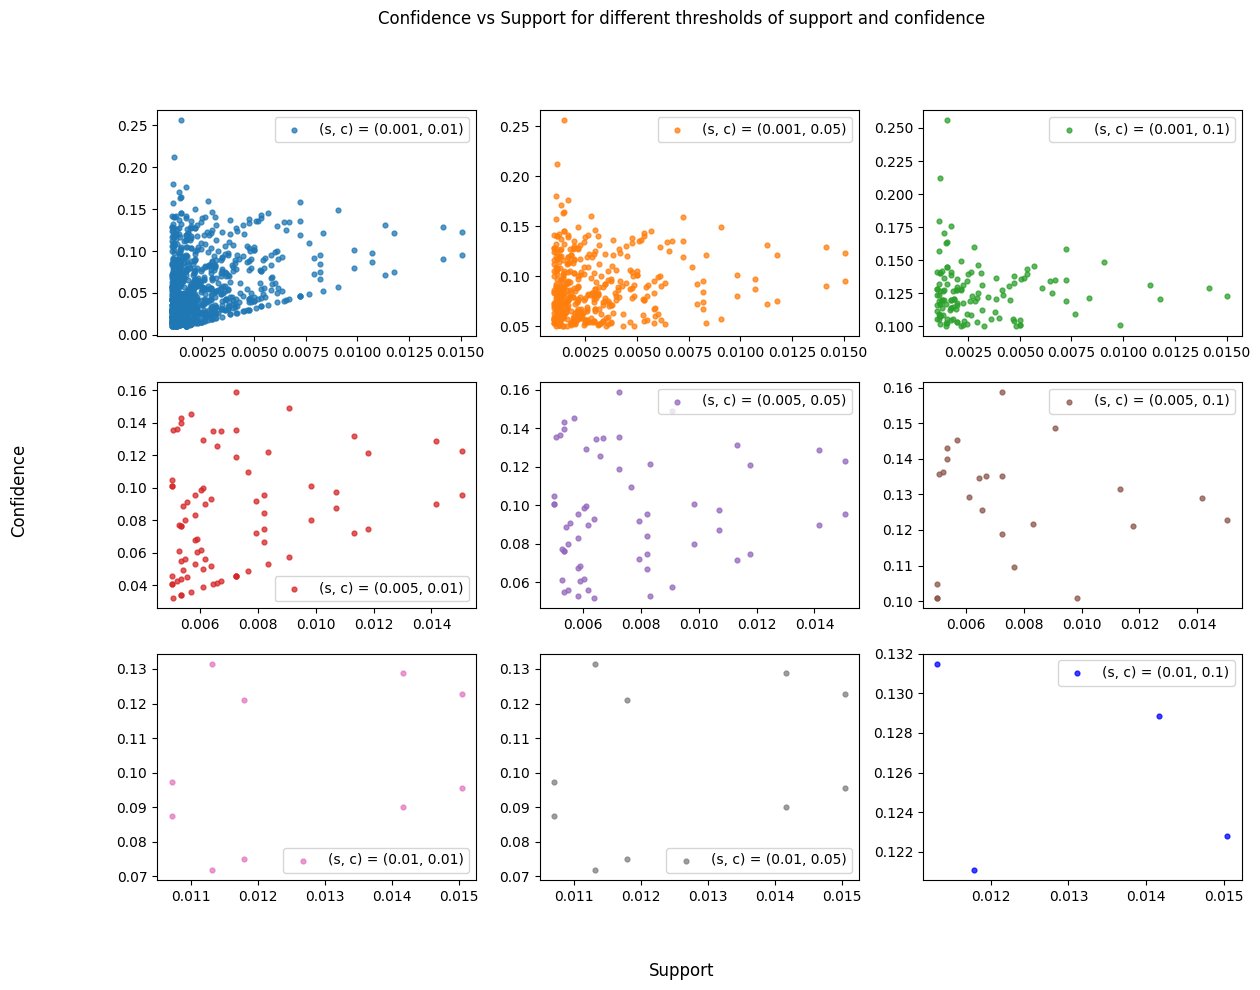

In [10]:
rule_colors = matplotlib.cm.tab10(range(9))
plt.rcParams['figure.figsize'] = [14, 10]

fig, ax = plt.subplots(nrows=3, ncols=3)
for i, r in enumerate(rules):
    row = i // 3
    col = i % 3
    ax_c = ax[row, col]
    ax_c.scatter(r['support'], r['confidence'], s=12, c=[rule_colors[i] if i<8 else 'blue'], alpha=0.75,
                label=f"(s, c) = ({support_thresholds[row]}, {confidence_thresholds[col]})")
    ax_c.legend()
plt.suptitle('Confidence vs Support for different thresholds of support and confidence')
fig.supylabel('Confidence')
fig.supxlabel('Support')
plt.show()

## Analysis of results and how they change with each pair of minimum support and minimum confidence

1. At low thresholds of Support and Confidence there are many association rules selected by the alghoritm.<br>
2. When Support threshold is increased only most frequent items are considered and the number of rules decreases.<br>
3. When Confidence threshold is increased, only rules rules that have the ratio of support(item1→item2) / support(item1) higher than the threshold are kept so the number of rules decreases. <br>
4. When both thresholds for Support and Confidence are increased only the rules that with higher Confidence and higher support are kept.<br>
<br>
For example, when Support >= 0.01 and Confidence >= 0.05


In [11]:
# support_threshold = 0.01, confidence_threshold = 0.05
selected_rules = rules[7]
selected_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(yogurt),(whole milk),0.086055,0.157406,0.011316,0.131496,0.835393,-0.002230,0.970167,-0.177357
7,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224,-0.199330
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536,-0.243170
5,(soda),(whole milk),0.097371,0.157406,0.011790,0.121086,0.769256,-0.003537,0.958676,-0.249427
1,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192,-0.224494
2,(whole milk),(other vegetables),0.157406,0.122510,0.015043,0.095566,0.780069,-0.004241,0.970209,-0.250716
6,(whole milk),(rolls/buns),0.157406,0.109906,0.014162,0.089970,0.818604,-0.003138,0.978092,-0.208227
0,(other vegetables),(rolls/buns),0.122510,0.109906,0.010706,0.087389,0.795125,-0.002759,0.975327,-0.226986
4,(whole milk),(soda),0.157406,0.097371,0.011790,0.074903,0.769256,-0.003537,0.975713,-0.262533
8,(whole milk),(yogurt),0.157406,0.086055,0.011316,0.071890,0.835393,-0.002230,0.984738,-0.189529


We can see that for support_threshold = 0.01, the 3 most confident rules are:<br>
<br>
(yogurt) -> (whole milk)<br>
(rolls/buns) -> (whole milk)<br>
(other vegetables) -> (whole milk)

## Store Manager insights and actions

### Decide which result sets are meaningful
Manager can look at the item (product) support and decide to use a specific threshold.<br>
For example, she/he can decide to work with top k=10 items in terms of antecedent support.<br>
Then she/he can run apriori algorithm with that threshold of support and select a number of association rules or similarly a threshold for confidence.

In [12]:
# Select items with highest support
selected_rulse = rules[0]
selected_rules.sort_values('support', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(whole milk),(other vegetables),0.157406,0.122510,0.015043,0.095566,0.780069,-0.004241,0.970209,-0.250716
3,(other vegetables),(whole milk),0.122510,0.157406,0.015043,0.122788,0.780069,-0.004241,0.960536,-0.243170
6,(whole milk),(rolls/buns),0.157406,0.109906,0.014162,0.089970,0.818604,-0.003138,0.978092,-0.208227
7,(rolls/buns),(whole milk),0.109906,0.157406,0.014162,0.128853,0.818604,-0.003138,0.967224,-0.199330
4,(whole milk),(soda),0.157406,0.097371,0.011790,0.074903,0.769256,-0.003537,0.975713,-0.262533
5,(soda),(whole milk),0.097371,0.157406,0.011790,0.121086,0.769256,-0.003537,0.958676,-0.249427
8,(whole milk),(yogurt),0.157406,0.086055,0.011316,0.071890,0.835393,-0.002230,0.984738,-0.189529
9,(yogurt),(whole milk),0.086055,0.157406,0.011316,0.131496,0.835393,-0.002230,0.970167,-0.177357
0,(other vegetables),(rolls/buns),0.122510,0.109906,0.010706,0.087389,0.795125,-0.002759,0.975327,-0.226986
1,(rolls/buns),(other vegetables),0.109906,0.122510,0.010706,0.097411,0.795125,-0.002759,0.972192,-0.224494


#### Manager then decides the set of meaningful rules

In [13]:
# From above table, select support_threshold=0.01
freq_items_t = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)
manager_rules = association_rules(freq_items_t, metric="confidence", min_threshold=0.01)
manager_rules.sort_values('confidence', ascending=False)[['antecedents', 'consequents', 'confidence']][:10]

Processing 15 combinations | Sampling itemset size 3 2


,antecedents,consequents,confidence
9,(yogurt),(whole milk),0.131496
7,(rolls/buns),(whole milk),0.128853
3,(other vegetables),(whole milk),0.122788
5,(soda),(whole milk),0.121086
1,(rolls/buns),(other vegetables),0.097411
2,(whole milk),(other vegetables),0.095566
6,(whole milk),(rolls/buns),0.089970
0,(other vegetables),(rolls/buns),0.087389
4,(whole milk),(soda),0.074903
8,(whole milk),(yogurt),0.071890


### Manager actions to improve sales, order inventory and ensure items are accessible easily
<br>
Based on the selected rules the manager can decide to:<br>

1. Improve sales by discounting either the antecedents items or the consequents items or both.<br>
For example, given the above selected association rules, the manager can decide to discount 'yogurt' while also preparing to increase 'whole milk' inventory in anticipation of higher sales of 'yogurt'. Another decision can be made to discount items if they are bought together, for example if the store has high inventory of already discounted 'soda' which cannot be further discounted, the manager can offer a discount only when 'soda' and 'whole milk' are bought together without discounting 'whole milk' itself.<br>
2. Order inventory pro-actively, for example ordering 'other vegetables' together with {'rolls/buns' and 'whole milk'}. Also keeping inventory levels that can satisfy the most confident association rules.
3. Arrange items to shelves/refrigerators in such a way that the most confident association rules are followed with items kept in close vicinity. For example keeping 'yogurt' and 'whole milk' nearby and similarly 'rolls/buns' and 'other vegetables'. Also the manager can identify the most frequently bought items and give them a shelf location that is easily accessible
